In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date
from nsepy import get_history
infy = get_history(symbol='INFY',start=date(2015,1,1),end=date(2018,9,30))
tcs = get_history(symbol='TCS',start=date(2015,1,1),end=date(2018,9,30))
nifty = get_history(symbol='NIFTYIT',start=date(2015,1,1),end=date(2018,9,30),index=True)
print(infy.shape)
print(tcs.shape)
print(nifty.shape)

(928, 14)
(928, 14)
(928, 6)


In [3]:
infy.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [4]:
nifty.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150.0,3.575100e+09
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862.0,9.645600e+09
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018.0,1.059000e+10
2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739.0,1.364500e+10
2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356.0,1.203440e+10


In [5]:
print(infy.isnull().sum(),"\n")
print((nifty.isnull().sum()),"\n")
print((tcs.isnull().sum()))

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64 

Open        0
High        0
Low         0
Close       0
Volume      8
Turnover    8
dtype: int64 

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64


In [32]:
for i in [infy,tcs,nifty]:
    i.index=pd.to_datetime(i.index)

In [6]:
for i in[tcs,infy]:
    i.drop(list(i.select_dtypes(include=['object']).columns),axis=1,inplace=True)
infy.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2015-01-01,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [7]:
infy.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,9.280000e+02,9.280000e+02,9.280000e+02,9.280000e+02,928.000000
mean,1199.092188,1198.731789,1210.845043,1185.072629,1197.703287,1197.753287,1197.970409,3.989775e+06,4.485901e+14,1.070506e+05,2.554996e+06,0.658363
std,365.906929,366.156199,369.574248,361.016149,365.418480,365.346499,365.037007,4.087695e+06,4.007171e+14,7.019720e+04,2.174225e+06,0.090583
min,705.300000,706.500000,717.400000,692.000000,710.000000,705.300000,706.400000,3.190360e+05,3.197183e+13,1.319600e+04,1.662220e+05,0.263800
25%,987.700000,987.925000,998.962500,978.375000,986.375000,987.175000,987.320000,2.339483e+06,2.731442e+14,7.398650e+04,1.504233e+06,0.603800
50%,1086.325000,1089.200000,1101.925000,1074.550000,1086.800000,1086.150000,1087.365000,3.141134e+06,3.603765e+14,9.444100e+04,2.101241e+06,0.667700
75%,1194.025000,1195.000000,1207.962500,1180.187500,1192.400000,1193.812500,1192.165000,4.359626e+06,4.989982e+14,1.212705e+05,3.024328e+06,0.719950
max,2324.700000,2328.500000,2336.000000,2292.050000,2323.200000,2324.700000,2322.170000,8.220248e+07,7.662502e+15,1.192900e+06,4.202849e+07,0.887000


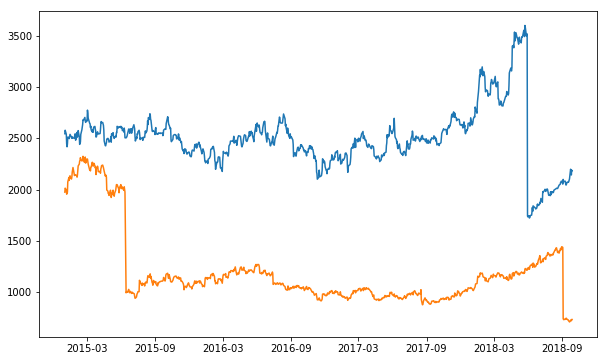

In [8]:
fig=plt.figure(figsize=(10,6))
for i in [tcs,infy]:
    plt.plot(i.index,i.Close)

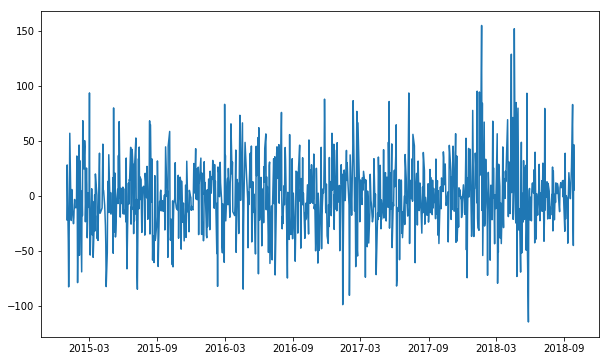

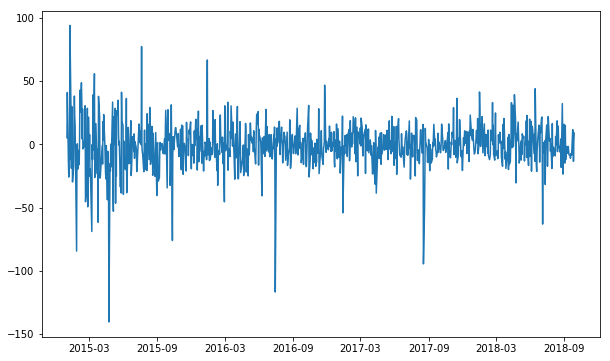

In [9]:
for i in [tcs,infy]:
    fig=plt.figure(figsize=(10,6))
    plt.plot(i.index,i.Close-i.Open)

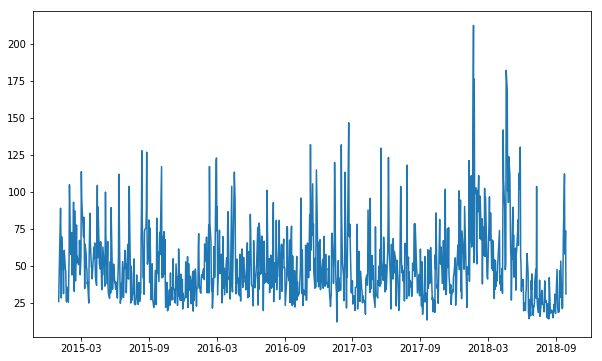

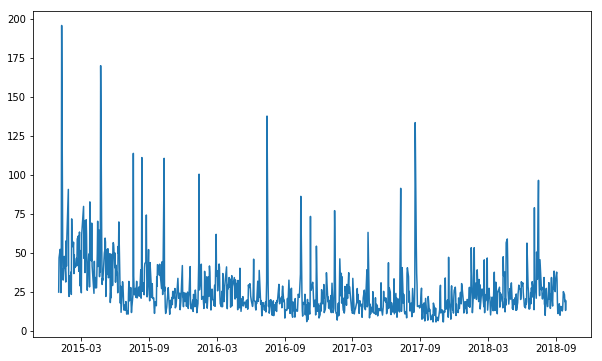

In [10]:
for i in [tcs,infy]:
    fig=plt.figure(figsize=(10,6))
    plt.plot(i.index,i.High-i.Low)

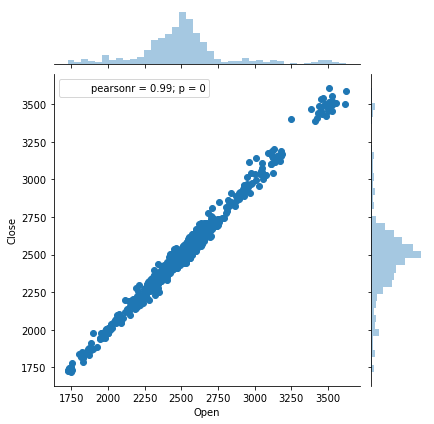

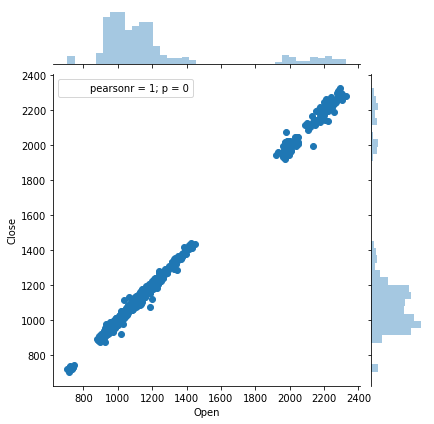

In [11]:
for i in [tcs,infy]:
    fig=plt.figure(figsize=(10,6))
    sns.jointplot(x="Open", y="Close", data=i)

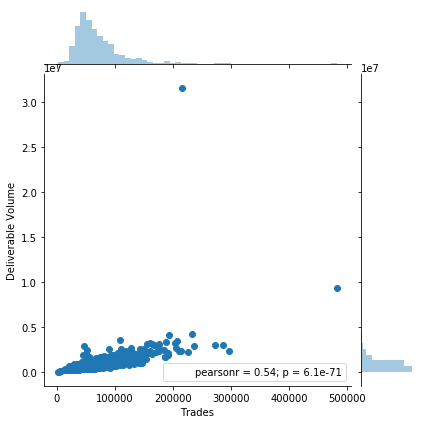

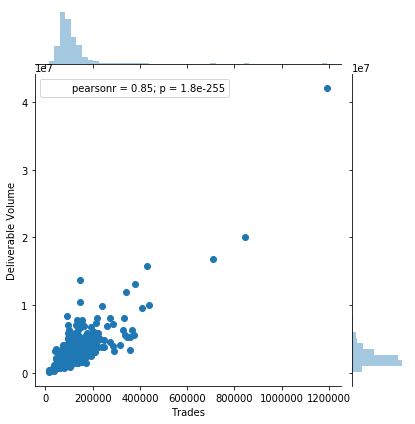

In [38]:
for i in [tcs,infy]:
    sns.jointplot("Trades","Deliverable Volume", data=i)

In [20]:
infy.corr()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Prev Close,1.000000,0.993662,0.993344,0.993044,0.992825,0.992801,0.993234,-0.187840,0.016086,-0.136517,-0.219649,0.068849
Open,0.993662,1.000000,0.999419,0.999277,0.998835,0.998824,0.999267,-0.191038,0.016088,-0.138450,-0.220882,0.076405
High,0.993344,0.999419,1.000000,0.999161,0.999444,0.999448,0.999710,-0.185005,0.024000,-0.131767,-0.216451,0.067424
Low,0.993044,0.999277,0.999161,1.000000,0.999539,0.999554,0.999705,-0.206685,-0.000921,-0.155751,-0.234345,0.083302
Last,0.992825,0.998835,0.999444,0.999539,1.000000,0.999975,0.999832,-0.198690,0.008817,-0.147249,-0.227798,0.075497
Close,0.992801,0.998824,0.999448,0.999554,0.999975,1.000000,0.999855,-0.198712,0.008764,-0.147202,-0.227855,0.075459
VWAP,0.993234,0.999267,0.999710,0.999705,0.999832,0.999855,1.000000,-0.197063,0.010648,-0.145110,-0.226698,0.074533
Volume,-0.187840,-0.191038,-0.185005,-0.206685,-0.198690,-0.198712,-0.197063,1.000000,0.960516,0.908071,0.962788,-0.193897
Turnover,0.016086,0.016088,0.024000,-0.000921,0.008817,0.008764,0.010648,0.960516,1.000000,0.902356,0.913894,-0.199300
Trades,-0.136517,-0.138450,-0.131767,-0.155751,-0.147249,-0.147202,-0.145110,0.908071,0.902356,1.000000,0.846275,-0.235282


In [39]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    fig=plt.figure(figsize=(10,6))
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=20)
    rolstd = pd.rolling_std(timeseries, window=20)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['open','high','10_day_volatility', '50_day_moving_avg'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()
  import sys


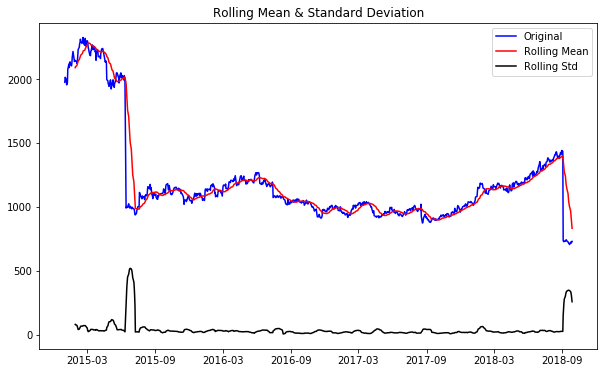

Results of Dickey-Fuller Test:
open                     -2.227994
high                      0.196243
10_day_volatility         0.000000
50_day_moving_avg       927.000000
Critical Value (1%)      -3.437424
Critical Value (5%)      -2.864663
Critical Value (10%)     -2.568433
dtype: float64


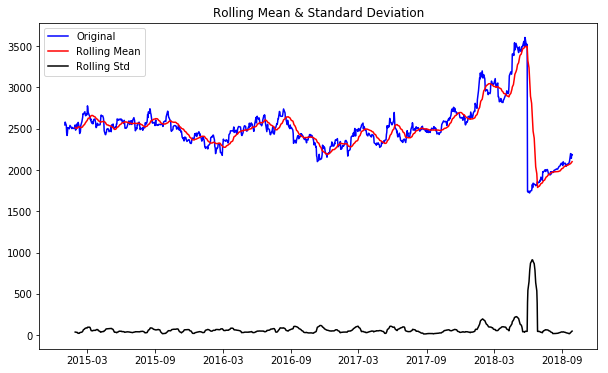

Results of Dickey-Fuller Test:
open                     -3.417485
high                      0.010377
10_day_volatility         0.000000
50_day_moving_avg       927.000000
Critical Value (1%)      -3.437424
Critical Value (5%)      -2.864663
Critical Value (10%)     -2.568433
dtype: float64


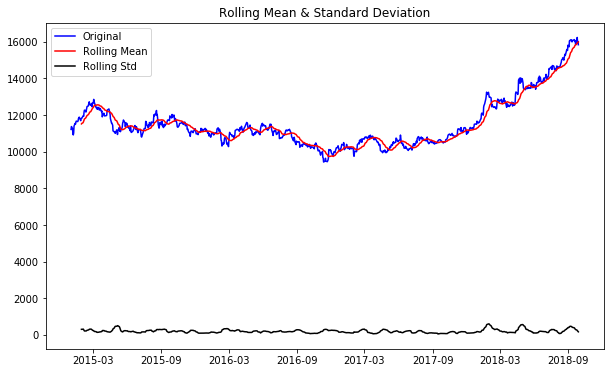

Results of Dickey-Fuller Test:
open                      0.551533
high                      0.986358
10_day_volatility         0.000000
50_day_moving_avg       927.000000
Critical Value (1%)      -3.437424
Critical Value (5%)      -2.864663
Critical Value (10%)     -2.568433
dtype: float64


In [41]:
for i in [infy,tcs,nifty]:
    print()
    test_stationarity(i.Close)